# MOA Notebook Example

This is an example of a MOA Notebook in Java.


## Prequential Evaluation Example
Let’s run a very simple experiment: using a decision tree (Hoeffding Tree) with data generated from an artificial stream generator (RandomRBFGenerator).

We should start importing the classes that we need, and defining the stream and the learner.

In [7]:
%maven nz.ac.waikato.cms.moa:moa:2018.6.0

import moa.classifiers.trees.HoeffdingTree;
import moa.streams.generators.RandomRBFGenerator;

HoeffdingTree learner = new HoeffdingTree();
RandomRBFGenerator stream = new RandomRBFGenerator();

Now, we need to initialize the stream and the classifier:

In [8]:
stream.prepareForUse();
learner.setModelContext(stream.getHeader());
learner.prepareForUse();

And finally, let’s run a prequential evaluation, as in Tutorial 2 (Introduction to the API of MOA).

1000000 instances processed with 91.0458% accuracy in 5.374780195 seconds.


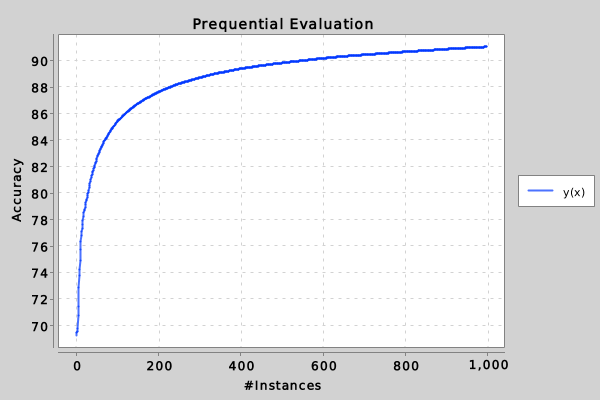

In [9]:
%maven org.knowm.xchart:xchart:3.5.2
import org.knowm.xchart.*;
import moa.core.TimingUtils;

int numInstances = 1000000;
int sampleSize = 1000;
boolean isTesting = true;
double[] xData = new double[numInstances/sampleSize];
double[] yData = new double[numInstances/sampleSize];

int numberSamplesCorrect = 0;
int numberSamples = 0;
boolean preciseCPUTiming = TimingUtils.enablePreciseTiming();
long evaluateStartTime = TimingUtils.getNanoCPUTimeOfCurrentThread();
while (stream.hasMoreInstances() && numberSamples < numInstances) {
    Instance trainInst = stream.nextInstance().getData();
    if (isTesting) {
            if (learner.correctlyClassifies(trainInst)){
                    numberSamplesCorrect++;
            }
    }
    if (numberSamples % sampleSize == 0){
        xData[numberSamples / sampleSize] = numberSamples / sampleSize;
        yData[numberSamples / sampleSize] = 100.0 * (double) numberSamplesCorrect/ (double) numberSamples;
    }
    numberSamples++;
    learner.trainOnInstance(trainInst);
}
double accuracy = 100.0 * (double) numberSamplesCorrect/ (double) numberSamples;
double time = TimingUtils.nanoTimeToSeconds(TimingUtils.getNanoCPUTimeOfCurrentThread()- evaluateStartTime);
System.out.println(numberSamples + " instances processed with " + accuracy + "% accuracy in "+time+" seconds.");

XYChart chart = QuickChart.getChart("Prequential Evaluation", "#Instances", "Accuracy", "y(x)", xData, yData);
BitmapEncoder.getBufferedImage(chart);

And, we can also run a prequential Evaluation task directly.

In [10]:
import moa.DoTask;
DoTask.main("EvaluatePrequential -l trees.HoeffdingTree -i 1000000".split(" "));


{M}assive {O}nline {A}nalysis
Version:  18.06 June 2018
Copyright: (C) 2007-2018 University of Waikato, Hamilton, New Zealand
Web: http://moa.cms.waikato.ac.nz/

                                                                               
Task completed in 4.88s (CPU time)



learning evaluation instances,evaluation time (cpu seconds),model cost (RAM-Hours),classified instances,classifications correct (percent),Kappa Statistic (percent),Kappa Temporal Statistic (percent),Kappa M Statistic (percent),model training instances,model serialized size (bytes),tree size (nodes),tree size (leaves),active learning leaves,tree depth,active leaf byte size estimate,inactive leaf byte size estimate,byte size estimate overhead
100000.0,0.605877315,0.0,100000.0,92.10000000000001,84.09118369648397,82.93736501079914,82.63736263736264,100000.0,0.0,187.0,118.0,118.0,5.0,0.0,0.0,1.0
200000.0,1.096047467,0.0,200000.0,93.2,86.13619960610498,85.15283842794761,84.29561200923789,200000.0,0.0,290.0,180.0,180.0,6.0,0.0,0.0,1.0
300000.0,1.471032032,0.0,300000.0,93.7,87.0415165128104,86.76470588235296,85.14150943396228,300000.0,0.0,368.0,228.0,228.0,6.0,0.0,0.0,1.0
400000.0,1.90322138,0.0,400000.0,95.1,90.00701548300785,90.18036072144288,88.57808857808857,400000.0,0.0,489.0,311.0,311.0,